In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
cars = pd.read_csv("/Users/justinphen/Documents/UCSD/22-23 Classes/DSC 148/used_cars_data.csv")

/Users/justinphen/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Feature Selection/Engineering

In [3]:
cars = cars.drop(columns=['bed','bed_height','bed_length','cabin','combine_fuel_economy','is_certified','is_cpo','is_oemcpo','vehicle_damage_category',\
                          'daysonmarket','latitude','listing_id','longitude','savings_amount','seller_rating','vin','dealer_zip','description',\
                            'engine_cylinders','engine_displacement','frame_damaged','listed_date','listing_color','main_picture_url','franchise_make',\
                                'power','salvage','sp_id','sp_name','theft_title','torque','transmission_display','trimId','trim_name',\
                                    'wheel_system_display','front_legroom','width'])

<AxesSubplot:>

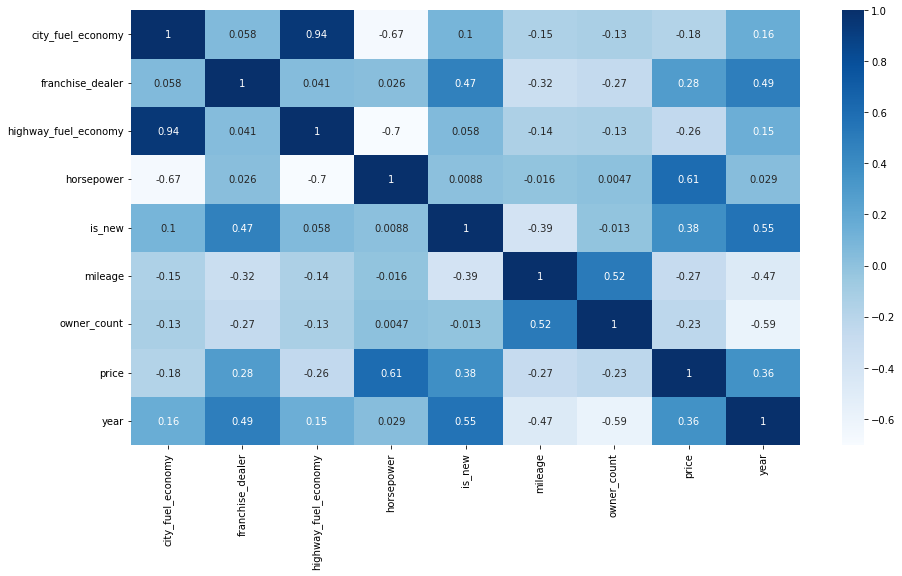

In [4]:
corr = cars.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap="Blues", annot=True)

In [5]:
cars

,back_legroom,body_type,city,city_fuel_economy,engine_type,exterior_color,fleet,franchise_dealer,fuel_tank_volume,fuel_type,...,make_name,maximum_seating,mileage,model_name,owner_count,price,transmission,wheel_system,wheelbase,year
0,35.1 in,SUV / Crossover,Bayamon,NaN,I4,Solar Yellow,NaN,True,12.7 gal,Gasoline,...,Jeep,5 seats,7.0,Renegade,NaN,23141.0,A,FWD,101.2 in,2019
1,38.1 in,SUV / Crossover,San Juan,NaN,I4,Narvik Black,NaN,True,17.7 gal,Gasoline,...,Land Rover,7 seats,8.0,Discovery Sport,NaN,46500.0,A,AWD,107.9 in,2020
2,35.4 in,Sedan,Guaynabo,17.0,H4,None,False,True,15.9 gal,Gasoline,...,Subaru,5 seats,NaN,WRX STI,3.0,46995.0,M,AWD,104.3 in,2016
3,37.6 in,SUV / Crossover,San Juan,NaN,V6,Eiger Gray,NaN,True,23.5 gal,Gasoline,...,Land Rover,7 seats,11.0,Discovery,NaN,67430.0,A,AWD,115 in,2020
4,38.1 in,SUV / Crossover,San Juan,NaN,I4,Narvik Black,NaN,True,17.7 gal,Gasoline,...,Land Rover,7 seats,7.0,Discovery Sport,NaN,48880.0,A,AWD,107.9 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,39.7 in,SUV / Crossover,Fairfield,26.0,I4,Silver,True,False,14.9 gal,Gasoline,...,Chevrolet,5 seats,41897.0,Equinox,1.0,17998.0,A,FWD,107.3 in,2018
3000036,38.4 in,SUV / Crossover,Vallejo,18.0,V6,Mosaic Black Metallic,NaN,True,19.4 gal,Gasoline,...,Chevrolet,8 seats,5.0,Traverse,NaN,36490.0,A,FWD,120.9 in,2020
3000037,38.3 in,Sedan,Napa,NaN,NaN,Gray,False,True,16.5 gal,NaN,...,Ford,5 seats,57992.0,Fusion,2.0,12990.0,A,FWD,112.2 in,2016
3000038,35 in,Sedan,Fairfield,30.0,I4 Diesel,Green,False,False,14.8 gal,Diesel,...,Jaguar,5 seats,27857.0,XE,1.0,26998.0,A,AWD,111.6 in,2017


In [6]:
cars.columns

Index(['back_legroom', 'body_type', 'city', 'city_fuel_economy', 'engine_type',
       'exterior_color', 'fleet', 'franchise_dealer', 'fuel_tank_volume',
       'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy',
       'horsepower', 'interior_color', 'isCab', 'is_new', 'length',
       'major_options', 'make_name', 'maximum_seating', 'mileage',
       'model_name', 'owner_count', 'price', 'transmission', 'wheel_system',
       'wheelbase', 'year'],
      dtype='object')

In [7]:
cars = cars.rename({'back_legroom':'back_legroom_inch', 'fuel_tank_volume':'fuel_tank_volume_gal', 'height':'height_in', 'length':'length_in', 'wheelbase':'wheelbase_inch'}, axis=1)
cars

,back_legroom_inch,body_type,city,city_fuel_economy,engine_type,exterior_color,fleet,franchise_dealer,fuel_tank_volume_gal,fuel_type,...,make_name,maximum_seating,mileage,model_name,owner_count,price,transmission,wheel_system,wheelbase_inch,year
0,35.1 in,SUV / Crossover,Bayamon,NaN,I4,Solar Yellow,NaN,True,12.7 gal,Gasoline,...,Jeep,5 seats,7.0,Renegade,NaN,23141.0,A,FWD,101.2 in,2019
1,38.1 in,SUV / Crossover,San Juan,NaN,I4,Narvik Black,NaN,True,17.7 gal,Gasoline,...,Land Rover,7 seats,8.0,Discovery Sport,NaN,46500.0,A,AWD,107.9 in,2020
2,35.4 in,Sedan,Guaynabo,17.0,H4,None,False,True,15.9 gal,Gasoline,...,Subaru,5 seats,NaN,WRX STI,3.0,46995.0,M,AWD,104.3 in,2016
3,37.6 in,SUV / Crossover,San Juan,NaN,V6,Eiger Gray,NaN,True,23.5 gal,Gasoline,...,Land Rover,7 seats,11.0,Discovery,NaN,67430.0,A,AWD,115 in,2020
4,38.1 in,SUV / Crossover,San Juan,NaN,I4,Narvik Black,NaN,True,17.7 gal,Gasoline,...,Land Rover,7 seats,7.0,Discovery Sport,NaN,48880.0,A,AWD,107.9 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,39.7 in,SUV / Crossover,Fairfield,26.0,I4,Silver,True,False,14.9 gal,Gasoline,...,Chevrolet,5 seats,41897.0,Equinox,1.0,17998.0,A,FWD,107.3 in,2018
3000036,38.4 in,SUV / Crossover,Vallejo,18.0,V6,Mosaic Black Metallic,NaN,True,19.4 gal,Gasoline,...,Chevrolet,8 seats,5.0,Traverse,NaN,36490.0,A,FWD,120.9 in,2020
3000037,38.3 in,Sedan,Napa,NaN,NaN,Gray,False,True,16.5 gal,NaN,...,Ford,5 seats,57992.0,Fusion,2.0,12990.0,A,FWD,112.2 in,2016
3000038,35 in,Sedan,Fairfield,30.0,I4 Diesel,Green,False,False,14.8 gal,Diesel,...,Jaguar,5 seats,27857.0,XE,1.0,26998.0,A,AWD,111.6 in,2017


In [8]:
# Change column types
sample = cars.copy()
sample = sample.dropna(subset=['back_legroom_inch','body_type','city','engine_type','exterior_color','fuel_tank_volume_gal','maximum_seating','wheelbase_inch'])
sample = sample[(sample.back_legroom_inch != '--') & (sample.back_legroom_inch != '') & (sample.fuel_tank_volume_gal != '--') & (sample.maximum_seating != '--') \
                & (sample.wheelbase_inch != '--') & (sample.length_in != '--')]
sample['back_legroom_inch'] = sample['back_legroom_inch'].str[:-3].astype(float)
sample['fuel_tank_volume_gal'] = sample['fuel_tank_volume_gal'].str[:-4].astype(float)
sample['maximum_seating'] = sample['maximum_seating'].str[:-6].astype(int)
sample['wheelbase_inch'] = sample['wheelbase_inch'].str[:-3].astype(float)
sample['height_in'] = sample['height_in'].str[:-3].astype(float)
sample['length_in'] = sample['length_in'].str[:-3].astype(float)
sample

,back_legroom_inch,body_type,city,city_fuel_economy,engine_type,exterior_color,fleet,franchise_dealer,fuel_tank_volume_gal,fuel_type,...,make_name,maximum_seating,mileage,model_name,owner_count,price,transmission,wheel_system,wheelbase_inch,year
0,35.1,SUV / Crossover,Bayamon,NaN,I4,Solar Yellow,NaN,True,12.7,Gasoline,...,Jeep,5,7.0,Renegade,NaN,23141.0,A,FWD,101.2,2019
1,38.1,SUV / Crossover,San Juan,NaN,I4,Narvik Black,NaN,True,17.7,Gasoline,...,Land Rover,7,8.0,Discovery Sport,NaN,46500.0,A,AWD,107.9,2020
2,35.4,Sedan,Guaynabo,17.0,H4,None,False,True,15.9,Gasoline,...,Subaru,5,NaN,WRX STI,3.0,46995.0,M,AWD,104.3,2016
3,37.6,SUV / Crossover,San Juan,NaN,V6,Eiger Gray,NaN,True,23.5,Gasoline,...,Land Rover,7,11.0,Discovery,NaN,67430.0,A,AWD,115.0,2020
4,38.1,SUV / Crossover,San Juan,NaN,I4,Narvik Black,NaN,True,17.7,Gasoline,...,Land Rover,7,7.0,Discovery Sport,NaN,48880.0,A,AWD,107.9,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000034,32.6,Pickup Truck,Ukiah,18.0,V6,White,False,True,21.1,Gasoline,...,Toyota,5,20009.0,Tacoma,1.0,40993.0,A,4WD,127.4,2017
3000035,39.7,SUV / Crossover,Fairfield,26.0,I4,Silver,True,False,14.9,Gasoline,...,Chevrolet,5,41897.0,Equinox,1.0,17998.0,A,FWD,107.3,2018
3000036,38.4,SUV / Crossover,Vallejo,18.0,V6,Mosaic Black Metallic,NaN,True,19.4,Gasoline,...,Chevrolet,8,5.0,Traverse,NaN,36490.0,A,FWD,120.9,2020
3000038,35.0,Sedan,Fairfield,30.0,I4 Diesel,Green,False,False,14.8,Diesel,...,Jaguar,5,27857.0,XE,1.0,26998.0,A,AWD,111.6,2017


In [9]:
sample.columns

Index(['back_legroom_inch', 'body_type', 'city', 'city_fuel_economy',
       'engine_type', 'exterior_color', 'fleet', 'franchise_dealer',
       'fuel_tank_volume_gal', 'fuel_type', 'has_accidents', 'height_in',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'length_in', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'price', 'transmission',
       'wheel_system', 'wheelbase_inch', 'year'],
      dtype='object')

In [10]:
# Final feature selections
final = sample[['body_type', 'engine_type', 'back_legroom_inch', 'city_fuel_economy', 'franchise_dealer', 'fuel_tank_volume_gal', 'highway_fuel_economy', 'horsepower', \
                'is_new', 'maximum_seating', 'mileage', 'wheelbase_inch', 'height_in', 'length_in', 'year', 'make_name', 'transmission', 'wheel_system', 'price']]
final = final.dropna()
final.reset_index(drop=True, inplace=True)
final

,body_type,engine_type,back_legroom_inch,city_fuel_economy,franchise_dealer,fuel_tank_volume_gal,highway_fuel_economy,horsepower,is_new,maximum_seating,mileage,wheelbase_inch,height_in,length_in,year,make_name,transmission,wheel_system,price
0,Sedan,I6,35.1,22.0,True,15.8,33.0,320.0,False,5,6903.0,110.6,56.5,182.5,2016,BMW,A,AWD,58995.0
1,Sedan,I4,38.1,27.0,True,15.8,36.0,160.0,False,5,42394.0,111.4,57.6,193.8,2018,Chevrolet,A,FWD,14639.0
2,Coupe,V6,27.3,18.0,True,17.4,24.0,311.0,False,4,62251.0,107.5,55.1,184.8,2018,Lexus,A,AWD,32000.0
3,SUV / Crossover,V6,38.4,18.0,True,19.4,27.0,310.0,False,8,36410.0,120.9,70.7,204.3,2018,Chevrolet,A,FWD,23723.0
4,SUV / Crossover,V6,36.8,15.0,True,22.0,22.0,281.0,False,8,36055.0,118.9,69.9,203.7,2017,Chevrolet,A,AWD,22422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292483,Pickup Truck,V6,32.6,18.0,True,21.1,23.0,278.0,False,5,20009.0,127.4,70.6,212.3,2017,Toyota,A,4WD,40993.0
2292484,SUV / Crossover,I4,39.7,26.0,False,14.9,32.0,170.0,False,5,41897.0,107.3,65.4,183.1,2018,Chevrolet,A,FWD,17998.0
2292485,SUV / Crossover,V6,38.4,18.0,True,19.4,27.0,310.0,True,8,5.0,120.9,70.7,204.3,2020,Chevrolet,A,FWD,36490.0
2292486,Sedan,I4 Diesel,35.0,30.0,False,14.8,40.0,180.0,False,5,27857.0,111.6,55.7,183.9,2017,Jaguar,A,AWD,26998.0


In [11]:
# Transform boolean columns (True=1, False=0)
final['franchise_dealer'] = final['franchise_dealer'].astype(int)
final['is_new'] = final['is_new'].astype(int)
final

,body_type,engine_type,back_legroom_inch,city_fuel_economy,franchise_dealer,fuel_tank_volume_gal,highway_fuel_economy,horsepower,is_new,maximum_seating,mileage,wheelbase_inch,height_in,length_in,year,make_name,transmission,wheel_system,price
0,Sedan,I6,35.1,22.0,1,15.8,33.0,320.0,0,5,6903.0,110.6,56.5,182.5,2016,BMW,A,AWD,58995.0
1,Sedan,I4,38.1,27.0,1,15.8,36.0,160.0,0,5,42394.0,111.4,57.6,193.8,2018,Chevrolet,A,FWD,14639.0
2,Coupe,V6,27.3,18.0,1,17.4,24.0,311.0,0,4,62251.0,107.5,55.1,184.8,2018,Lexus,A,AWD,32000.0
3,SUV / Crossover,V6,38.4,18.0,1,19.4,27.0,310.0,0,8,36410.0,120.9,70.7,204.3,2018,Chevrolet,A,FWD,23723.0
4,SUV / Crossover,V6,36.8,15.0,1,22.0,22.0,281.0,0,8,36055.0,118.9,69.9,203.7,2017,Chevrolet,A,AWD,22422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292483,Pickup Truck,V6,32.6,18.0,1,21.1,23.0,278.0,0,5,20009.0,127.4,70.6,212.3,2017,Toyota,A,4WD,40993.0
2292484,SUV / Crossover,I4,39.7,26.0,0,14.9,32.0,170.0,0,5,41897.0,107.3,65.4,183.1,2018,Chevrolet,A,FWD,17998.0
2292485,SUV / Crossover,V6,38.4,18.0,1,19.4,27.0,310.0,1,8,5.0,120.9,70.7,204.3,2020,Chevrolet,A,FWD,36490.0
2292486,Sedan,I4 Diesel,35.0,30.0,0,14.8,40.0,180.0,0,5,27857.0,111.6,55.7,183.9,2017,Jaguar,A,AWD,26998.0


## EDA

<AxesSubplot:>

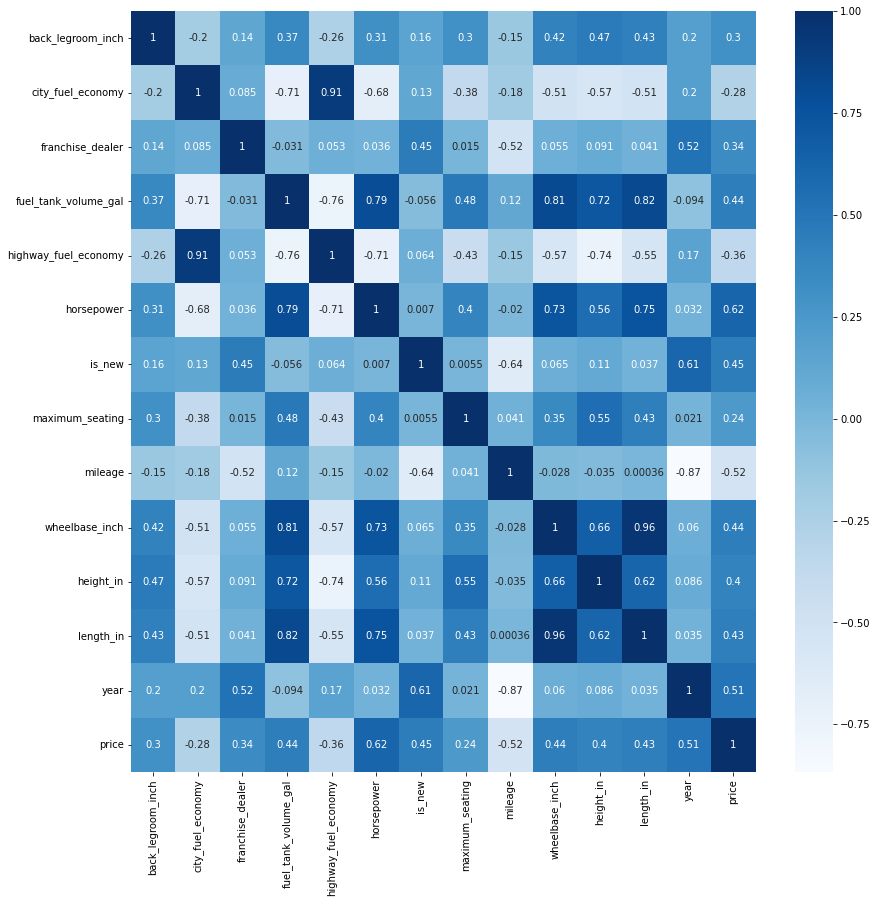

In [33]:
corr = final.corr()
plt.figure(figsize=corr.shape)
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:ylabel='body_type'>

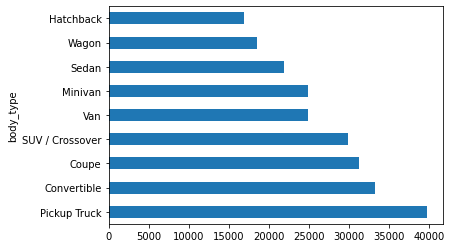

In [34]:
#body_type
final.groupby('body_type')['price'].mean('price').sort_values(ascending = False).plot.barh()

<AxesSubplot:ylabel='engine_type'>

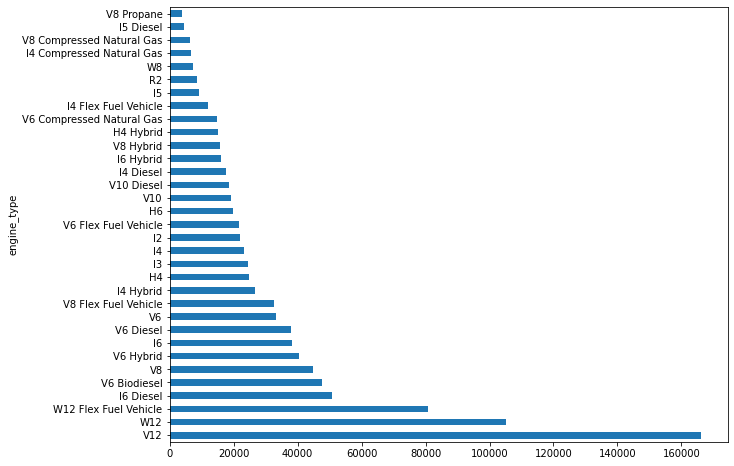

In [35]:
#engine_type
final.groupby('engine_type')['price'].mean('price').sort_values(ascending = False).plot.barh(figsize=(10, 8))

<AxesSubplot:ylabel='make_name'>

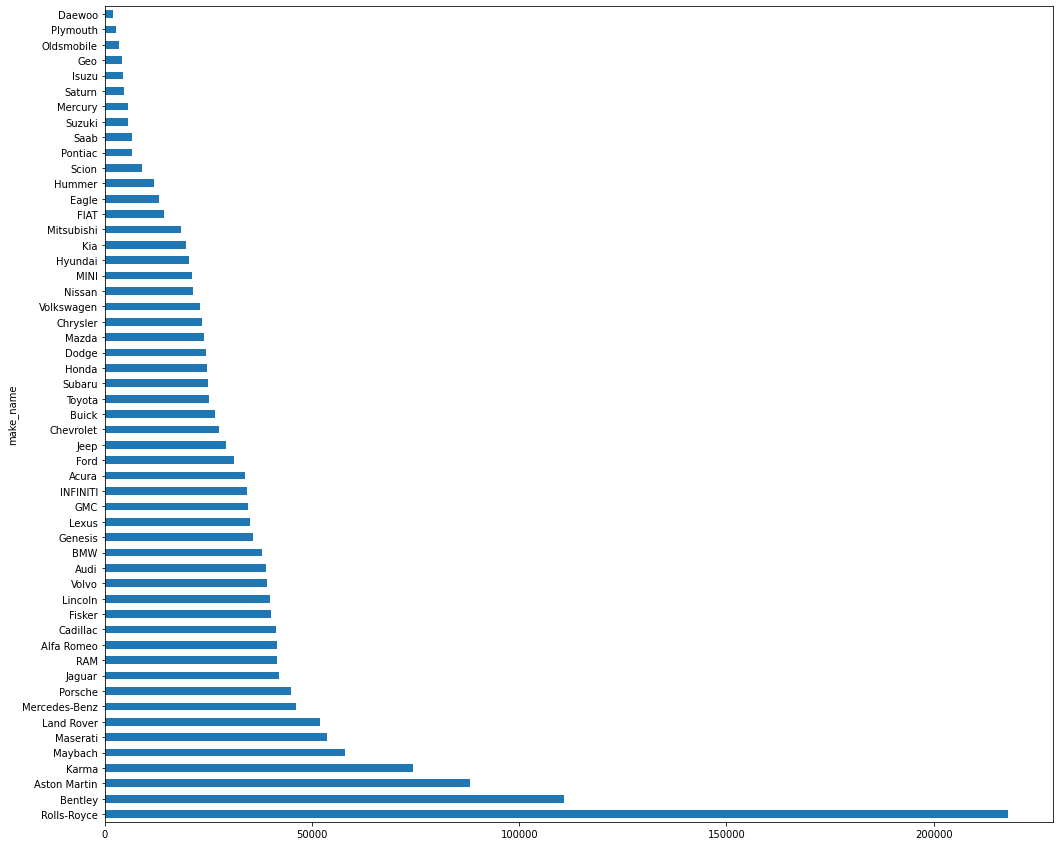

In [31]:
#make_name
final.groupby('make_name')['price'].mean('price').sort_values(ascending = False).plot.barh(figsize=(17, 15))

<AxesSubplot:ylabel='transmission'>

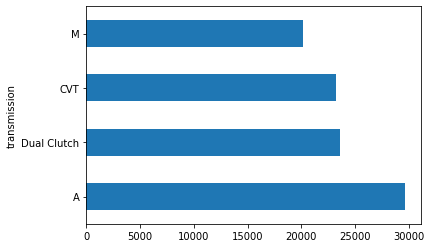

In [36]:
#transmission
final.groupby('transmission')['price'].mean('price').sort_values(ascending = False).plot.barh()

<AxesSubplot:ylabel='wheel_system'>

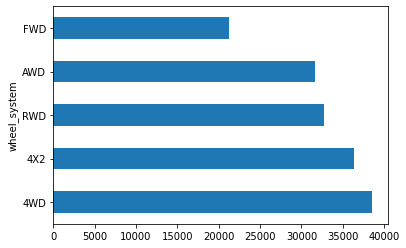

In [37]:
#wheel_system
final.groupby('wheel_system')['price'].mean('price').sort_values(ascending = False).plot.barh()

<AxesSubplot:ylabel='is_new'>

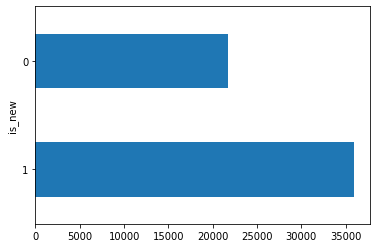

In [38]:
#is_new (1=True, 0=False)
final.groupby('is_new')['price'].mean('price').sort_values(ascending = False).plot.barh()

<AxesSubplot:ylabel='franchise_dealer'>

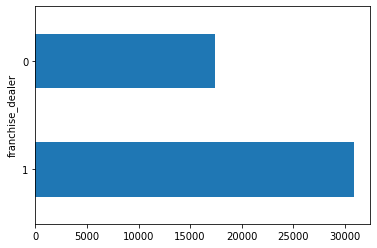

In [39]:
#franchise_dealer (1=True, 0=False)
final.groupby('franchise_dealer')['price'].mean('price').sort_values(ascending = False).plot.barh()

In [12]:
# Apply OneHotEncoder on categorical columns
ohe = OneHotEncoder()
feature_ar = ohe.fit_transform(final[['body_type','engine_type','make_name','transmission','wheel_system']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.concatenate(feature_labels)
cat_feat = pd.DataFrame(feature_ar, columns=feature_labels)
final = final.reset_index(drop=True)
df = pd.concat([final, cat_feat], axis=1)
df = df.drop(['body_type','engine_type','make_name','transmission','wheel_system'], axis=1)
df

,back_legroom_inch,city_fuel_economy,franchise_dealer,fuel_tank_volume_gal,highway_fuel_economy,horsepower,is_new,maximum_seating,mileage,wheelbase_inch,...,Volvo,A,CVT,Dual Clutch,M,4WD,4X2,AWD,FWD,RWD
0,35.1,22.0,1,15.8,33.0,320.0,0,5,6903.0,110.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.1,27.0,1,15.8,36.0,160.0,0,5,42394.0,111.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,27.3,18.0,1,17.4,24.0,311.0,0,4,62251.0,107.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,38.4,18.0,1,19.4,27.0,310.0,0,8,36410.0,120.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,36.8,15.0,1,22.0,22.0,281.0,0,8,36055.0,118.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292483,32.6,18.0,1,21.1,23.0,278.0,0,5,20009.0,127.4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2292484,39.7,26.0,0,14.9,32.0,170.0,0,5,41897.0,107.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2292485,38.4,18.0,1,19.4,27.0,310.0,1,8,5.0,120.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2292486,35.0,30.0,0,14.8,40.0,180.0,0,5,27857.0,111.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model Selection

In [40]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
temp = df.drop(['price'], axis=1)
X = temp[temp.columns]
y = df['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

#### Linear Regressor (Baseline Model)

In [41]:
baseline_cols = ['horsepower','mileage','fuel_tank_volume_gal']
base = LinearRegression()
base.fit(X_train[baseline_cols], y_train)
y_pred = base.predict(X_test[baseline_cols])
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_pred, y_test)
RMSE, r2

(9121.160079779993, 0.4837685689502361)

#### Random Forest Regressor (Baseline Model)

In [42]:
rfr = RandomForestRegressor()
rfr.fit(X_train[baseline_cols], y_train)
y_pred = rfr.predict(X_test[baseline_cols])
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_pred, y_test)
RMSE, r2

(5300.360186489742, 0.8767395572592939)

#### Linear Regressor (Default Params)

In [27]:
base = LinearRegression()
base.fit(X_train, y_train)
y_pred = base.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
RMSE, r2

(6929.851213536956, 0.8048355686173996)

#### XGB Regressor (Default Params)

In [29]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
RMSE, r2

(4266.87419895933, 0.9260100851664896)

#### Random Forest Regressor (Default Params)

In [30]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
RMSE, r2

(3927.5684106764106, 0.9373096973048781)

#### Hyperparameter Tuning for Random Forest Regressor

In [19]:
# Random Forest regressor seems to be the best option
# Will perform hyperparamter tuning
rfr = RandomForestRegressor()
param_grid = {"max_depth":    [5, 15, 25],
              "n_estimators": [50, 100, 250],
              "min_samples_leaf": [1, 5, 10],
              "min_samples_split": [2, 5, 10]}

rfr_gs = GridSearchCV(rfr, param_grid, cv=2, verbose=2, n_jobs=4).fit(X_train, y_train)
rfr_gs.best_params_

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.7min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.7min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.5min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.5min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 3.9min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 3.9min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.5min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.6min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=18.6min
[CV] END max_depth=5, min_samples_leaf=1, 

{'max_depth': 25,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [21]:
y_pred = rfr_gs.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

3755.58413375144

In [22]:
r2_score(y_test, y_pred)

0.9426797809559795